Nama Kelompok :

NPM : 200411100171 (Ketua)
Ahmad Farisul Haq

NPM : 200411100201 (Anggota)
Arifatul Maghfiroh

# Timeseries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
def df_to_X_y(df, window_size=2):
  X, y = [], []
  # df = df.to_numpy()
  for i in range(len(df) - window_size):
    seq_x, seq_y = df[i:i+window_size], df[i+window_size]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

## Read Data

In [3]:
data = pd.read_csv('airline-passengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Jumlah Data

In [4]:
data.count()

Month         144
Passengers    144
dtype: int64

## Set index dates to data

In [5]:
data["Month"] = pd.to_datetime(data.Month, dayfirst=True)
data.set_index("Month", inplace=True)

In [6]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## plot data

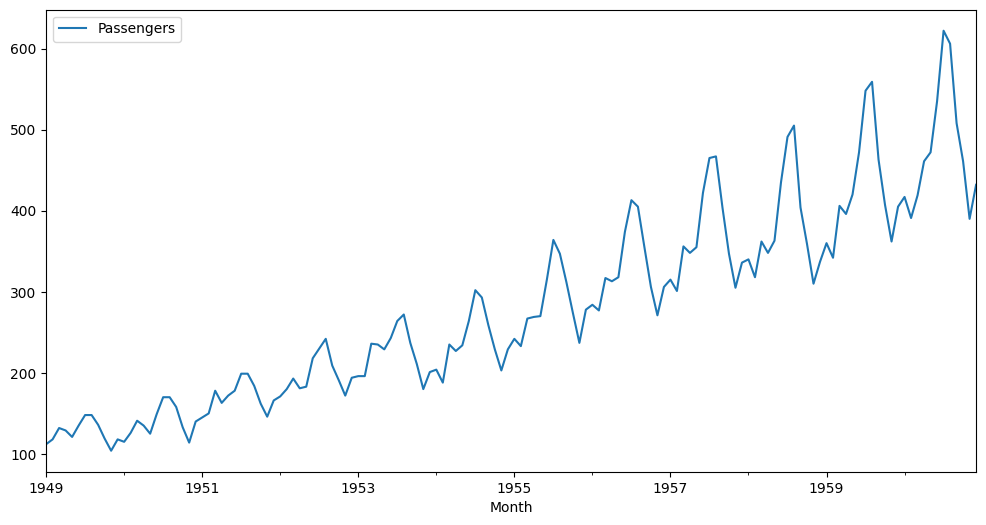

In [7]:
data.plot(figsize=(12,6)).autoscale(axis='x',tight=True)

# Prepocessing

## Timestamp

In [8]:
window_size = 14
X, y = df_to_X_y(data['Passengers'], window_size)

## Chek ukuran data

In [9]:
X.shape, y.shape

((130, 14), (130,))

## Normalisasi

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)
scaled

array([[0.01758242, 0.03076923, 0.06153846, ..., 0.00787402, 0.0019685 ,
        0.02362205],
       [0.03076923, 0.06153846, 0.05494505, ..., 0.0019685 , 0.02362205,
        0.05314961],
       [0.06153846, 0.05494505, 0.03736264, ..., 0.02362205, 0.05314961,
        0.04133858],
       ...,
       [1.        , 0.78901099, 0.66593407, ..., 1.        , 0.96850394,
        0.77559055],
       [0.78901099, 0.66593407, 0.56703297, ..., 0.96850394, 0.77559055,
        0.68307087],
       [0.66593407, 0.56703297, 0.66153846, ..., 0.77559055, 0.68307087,
        0.54330709]])

## Split data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=0, shuffle=False)

# Modelling

## Training

### GridSearch

In [28]:
model = KNeighborsRegressor()

parameters = {
    'n_neighbors': list(range(3,50,2))
}

search = GridSearchCV(model, parameters)
search.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49]})

In [29]:
search.best_score_, search.best_params_

(-0.7702406379395503, {'n_neighbors': 9})

In [30]:
model_knn = KNeighborsRegressor(n_neighbors=9)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

## Test

In [34]:
y_pred=model_knn.predict(X_train)

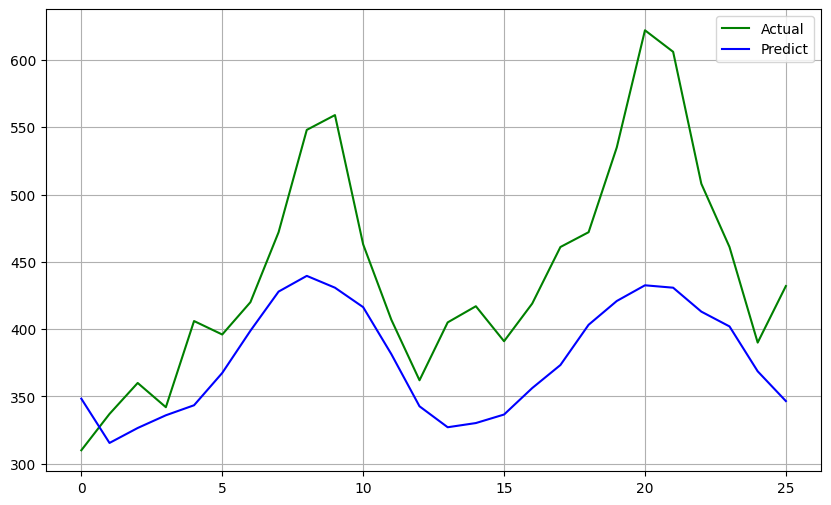

In [32]:
plt.figure(figsize=(10,6))
plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Closing Prices')
plt.plot(y_test, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()


# Evaluasi

## MAPE

In [35]:
print(f'mape = {mean_absolute_percentage_error(y_train, y_pred)}')

mape = 0.06388770988509919
